In [1]:
from IPython.core.display import HTML
HTML("<style>.container { width:90% !important; }</style>")

In [2]:
import new_functions as fn
fn = reload(fn)
import functions as fn2
fn2 = reload(fn2)

/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
import os
import numpy as np
import lsst.daf.persistence as dafPersist
import lsst.afw.display.ds9 as ds9
# import lsst.afw.display as afwDisplay
import lsst.afw.image as afwImage

import lsst.afw.geom as afwGeom
import lsst.afw.detection as afwDetect
import pyfits as pf
%matplotlib inline
import scipy
import scipy.ndimage as ndimage
import pylab as plt
import sys

N_AMPS = 16
HISTMIN = -1000
HISTMAX = 10000
NBINS = HISTMAX - HISTMIN + 1

Cannot import xpa: dlopen(/Users/photocal/lsst/DarwinX86/display_ds9/2015_10.0+27/python/lsst/display/ds9/_xpa.so, 10): Library not loaded: libxpa.1.dylib
  Referenced from: /Users/photocal/lsst/DarwinX86/display_ds9/2015_10.0+27/python/lsst/display/ds9/_xpa.so
  Reason: image not found


In [4]:
files = fn.GetFiles('/Users/mfisherlevine/Desktop/darks/', '*.fits')

Found 166 matching files


In [5]:
hists = [np.zeros(NBINS, dtype=np.float64) for _ in range(N_AMPS+1)]

In [6]:
exp_total = 0.
for filenum, filename in enumerate(files):
#     if filenum%1==0: print 'Processing file %s of %s'%(filenum, len(files)); sys.stdout.flush()
    f = pf.open(filename)
    exptime = f[0].header['EXPTIME']
    exp_total += exptime
    print 'Exptime = %s s for %s'%(exptime, filename)
    f.close()
print 'Total exposure time = %s hours'%(exp_total/3600.)

Exptime = 999.0 s for /Users/mfisherlevine/Desktop/darks/113-03_dark_dark_999.00_000_20140709014210.fits
Exptime = 999.0 s for /Users/mfisherlevine/Desktop/darks/113-03_dark_dark_999.00_000_20140710000611.fits
Exptime = 999.0 s for /Users/mfisherlevine/Desktop/darks/113-03_dark_dark_999.00_000_20140710120733.fits
Exptime = 999.0 s for /Users/mfisherlevine/Desktop/darks/113-03_dark_dark_999.00_000_20140710172413.fits
Exptime = 999.0 s for /Users/mfisherlevine/Desktop/darks/113-03_dark_dark_999.00_000_20140711131929.fits
Exptime = 999.0 s for /Users/mfisherlevine/Desktop/darks/113-03_dark_dark_999.00_001_20140709020004.fits
Exptime = 999.0 s for /Users/mfisherlevine/Desktop/darks/113-03_dark_dark_999.00_001_20140710002405.fits
Exptime = 999.0 s for /Users/mfisherlevine/Desktop/darks/113-03_dark_dark_999.00_001_20140710122526.fits
Exptime = 999.0 s for /Users/mfisherlevine/Desktop/darks/113-03_dark_dark_999.00_001_20140710174207.fits
Exptime = 999.0 s for /Users/mfisherlevine/Desktop/dark

In [7]:
for filenum, filename in enumerate(files):
    if filenum%25==0: print 'Processing file %s of %s'%(filenum, len(files)); sys.stdout.flush()
    f = pf.open(filename)
    for amp in xrange(1,1+N_AMPS):
        n_rows, n_cols = f[amp].data.shape
        data = f[amp].data[:,1:513]
        oscan = np.median(f[amp].data[:,513:n_cols])
        data -= oscan
#         fn2.ShowSpot(data[:,1:513], half_stretch=3)
        hist_vals = ndimage.histogram(data, HISTMIN, HISTMAX, NBINS)
        hists[amp] += hist_vals
    f.close()

Processing file 0 of 166
Processing file 25 of 166
Processing file 50 of 166
Processing file 75 of 166
Processing file 100 of 166
Processing file 125 of 166
Processing file 150 of 166


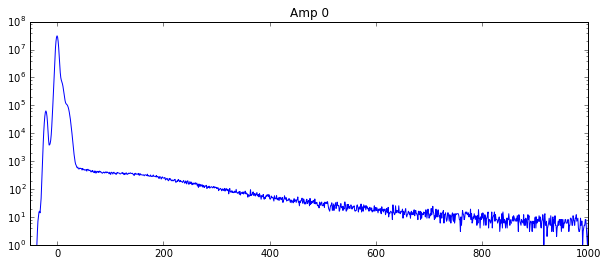

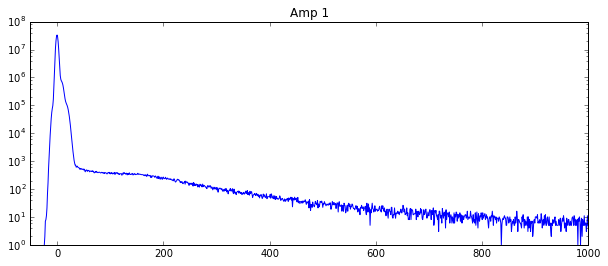

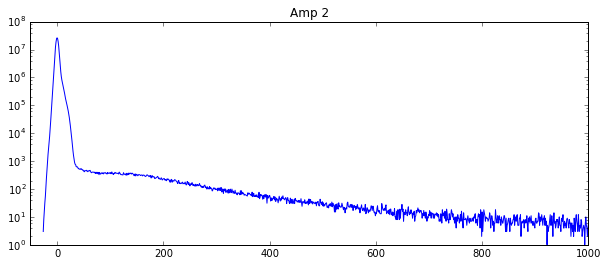

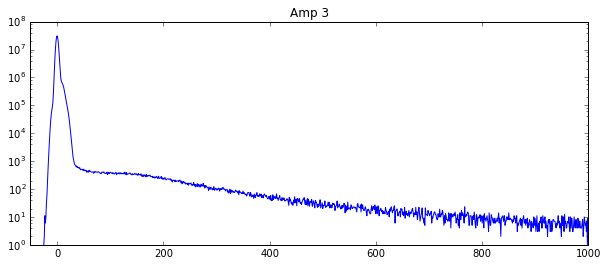

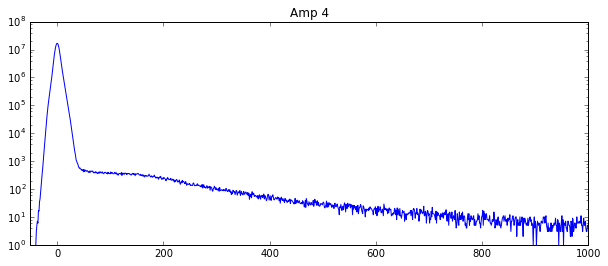

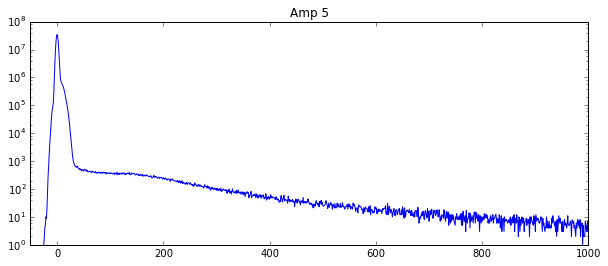

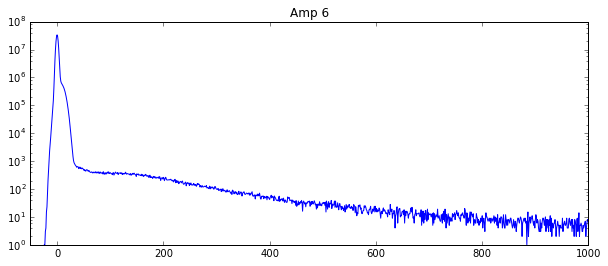

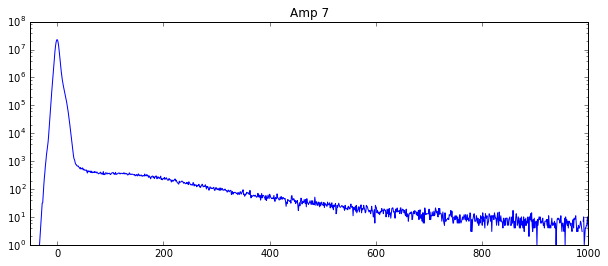

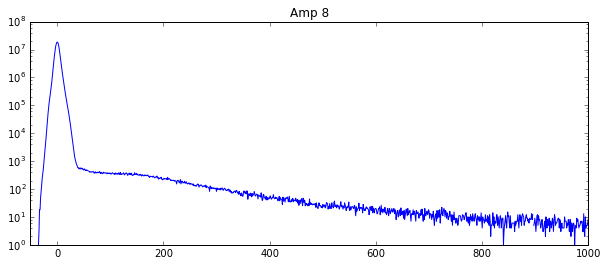

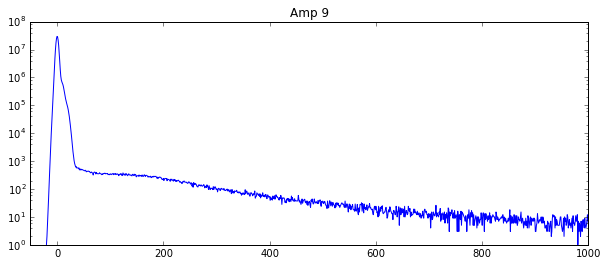

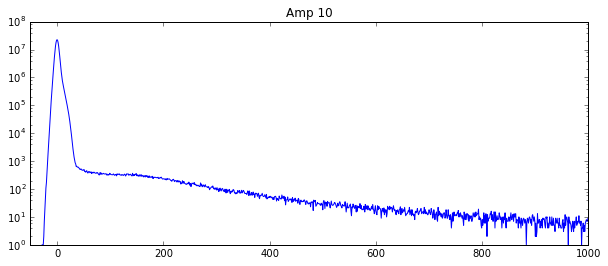

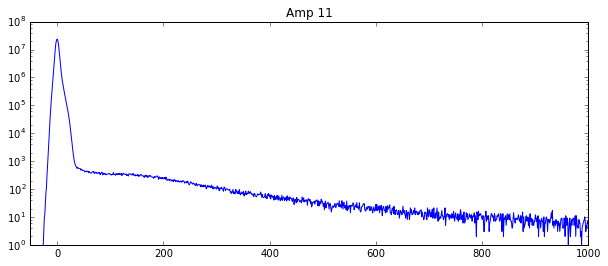

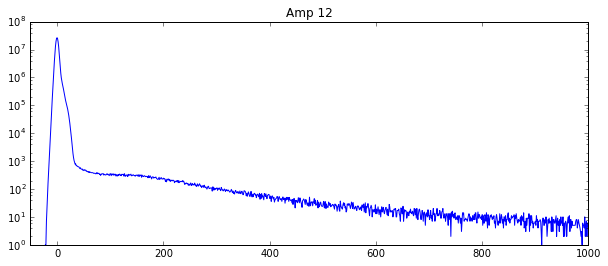

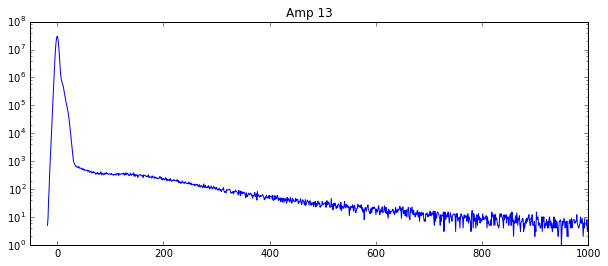

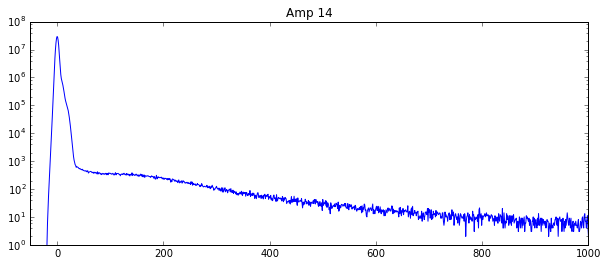

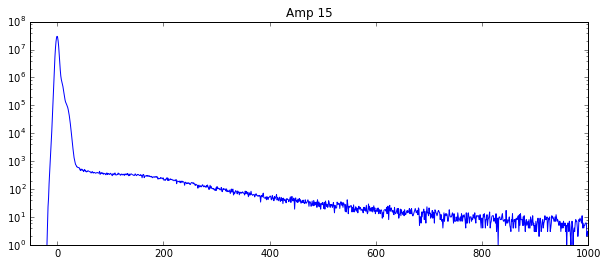

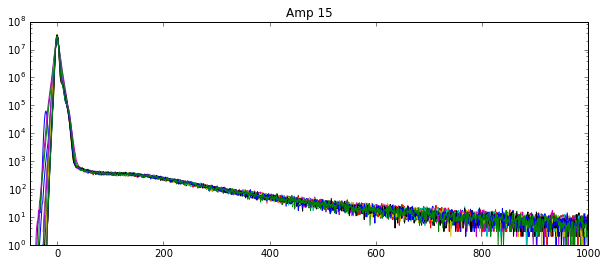

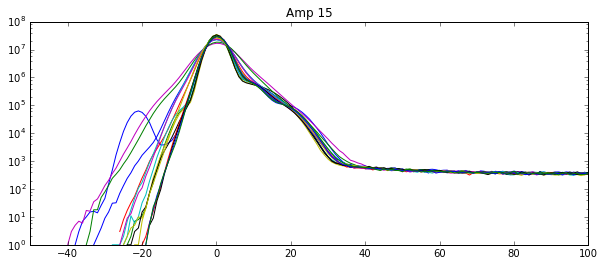

In [8]:
for amp in range(1,N_AMPS+1):
    fig = plt.figure(figsize=(10,4))
    xpoints = np.linspace(HISTMIN, HISTMAX, NBINS)
    plt.semilogy(xpoints, hists[amp])
    plt.xlim((-50,1000))
    plt.title('Amp %s'%(amp-1))
    plt.show()
    
fig = plt.figure(figsize=(10,4))
for amp in range(1,N_AMPS+1):
    xpoints = np.linspace(HISTMIN, HISTMAX, NBINS)
    plt.semilogy(xpoints, hists[amp])
    plt.xlim((-50,1000))
    plt.title('Amp %s'%(amp-1))

fig = plt.figure(figsize=(10,4))
for amp in range(1,N_AMPS+1):
    xpoints = np.linspace(HISTMIN, HISTMAX, NBINS)
    plt.semilogy(xpoints, hists[amp])
    plt.xlim((-50,100))
    plt.title('Amp %s'%(amp-1))


In [9]:
hists = [np.zeros(NBINS, dtype=np.float64) for _ in range(N_AMPS+1)]

n_sigma_thr = 6.

for filenum, filename in enumerate(files):
    if filenum%10==0: print 'Processing file %s of %s'%(filenum, len(files)); sys.stdout.flush()
    f = pf.open(filename)
    for amp in xrange(1,1+N_AMPS):
        n_rows, n_cols = f[amp].data.shape
        data = f[amp].data[:,1:513]
        oscan = np.median(f[amp].data[:,513:n_cols])
        data -= oscan
        mean, sigma = fn2.getClippedMeanandStddev(data,nsig=3)
        hist_vals = ndimage.histogram(data[data >= mean + (n_sigma_thr*sigma)], HISTMIN, HISTMAX, NBINS)
        hists[amp] += hist_vals
    f.close()

Processing file 0 of 166
Processing file 10 of 166
Processing file 20 of 166
Processing file 30 of 166
Processing file 40 of 166
Processing file 50 of 166
Processing file 60 of 166
Processing file 70 of 166
Processing file 80 of 166
Processing file 90 of 166
Processing file 100 of 166
Processing file 110 of 166
Processing file 120 of 166
Processing file 130 of 166
Processing file 140 of 166
Processing file 150 of 166
Processing file 160 of 166


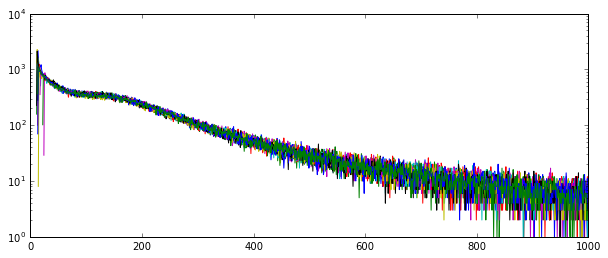

In [10]:
fig = plt.figure(figsize=(10,4))

for amp in range(1,N_AMPS+1):
    xpoints = np.linspace(HISTMIN, HISTMAX, NBINS)
    plt.semilogy(xpoints, hists[amp])
    plt.xlim((0,1000))
#     plt.title('Amp %s'%(amp-1))
#     plt.show()

In [11]:
hists = [np.zeros(NBINS, dtype=np.float64) for _ in range(N_AMPS+1)]
n_sigma_thr = 6.

THRESHOLD = 50
N_PIX_MIN = 2
GROW = 1
ISOTROPIC = True
VERBOSE = False

fluxes = [[] for _ in range(N_AMPS)]

for filenum, filename in enumerate(files):
    if filenum%10==0: print 'Processing file %s of %s'%(filenum, len(files)); sys.stdout.flush()
    f = pf.open(filename)
    for amp in xrange(1,1+N_AMPS):
        n_rows, n_cols = f[amp].data.shape
        data = f[amp].data[:,1:513]
        oscan = np.median(f[amp].data[:,522:])
        data -= oscan
        mean, sigma = fn2.getClippedMeanandStddev(data,nsig=3)
        
        image = afwImage.ImageF(data)
        maskedImg = afwImage.MaskedImageF(image)
        exposure = afwImage.ExposureF(maskedImg)

        threshold = afwDetect.Threshold(THRESHOLD, afwDetect.Threshold.VALUE)
        footPrintSet = afwDetect.FootprintSet(exposure.getMaskedImage(), threshold, "DETECTED", N_PIX_MIN)
        footPrintSet = afwDetect.FootprintSet(footPrintSet, GROW, ISOTROPIC)

        footPrints = footPrintSet.getFootprints()
        if VERBOSE: print "Found %s footprints in amp %s of file %s"%(footPrints.size(), amp, filename)
#         total_found += footPrints.size()

        if footPrints.size() >= 1000: # files with bright defects cause all sorts of problems
            print "Bad file - skipping amp %s in %s"%(amp, filename)
            continue

        for pointnum, footprint in enumerate(footPrints):
            flux = fn2.SumFootprintPixels(footprint,image)
            fluxes[amp-1].append(flux)
    f.close()

Processing file 0 of 166
Processing file 10 of 166
Processing file 20 of 166
Processing file 30 of 166
Processing file 40 of 166
Processing file 50 of 166
Processing file 60 of 166
Processing file 70 of 166
Processing file 80 of 166
Processing file 90 of 166
Processing file 100 of 166
Processing file 110 of 166
Processing file 120 of 166
Processing file 130 of 166
Processing file 140 of 166
Processing file 150 of 166
Processing file 160 of 166


Binsize = 207.070707071


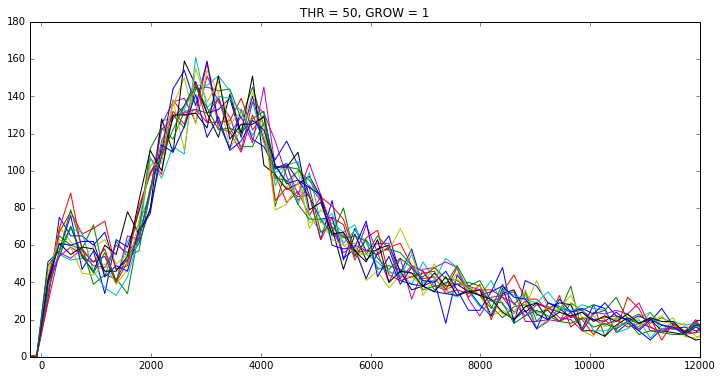

In [12]:
fig = plt.figure(figsize=(12,6))

HISTMIN = -500
HISTMAX = 20000.
NBINS = 100

xpoints = np.linspace(HISTMIN, HISTMAX, NBINS)
print 'Binsize = %s'%(xpoints[1]-xpoints[0])

for amp in range(N_AMPS):
    histvals = ndimage.histogram(np.asarray(fluxes[amp]),HISTMIN, HISTMAX, NBINS)
    plt.plot(xpoints, histvals)
    #     plt.semilogy(xpoints, histvals)
    plt.xlim((-200,12000))
    plt.title('THR = %s, GROW = %s'%(THRESHOLD, GROW))


In [9]:
hists = [np.zeros(NBINS, dtype=np.float64) for _ in range(N_AMPS+1)]
n_sigma_thr = 6.

THRESHOLD = 50
N_PIX_MIN = 2
GROW = 2
ISOTROPIC = True
VERBOSE = False

fluxes = [[] for _ in range(N_AMPS)]

for filenum, filename in enumerate(files):
    if filenum%10==0: print 'Processing file %s of %s'%(filenum, len(files)); sys.stdout.flush()
    f = pf.open(filename)
    for amp in xrange(1,1+N_AMPS):
        n_rows, n_cols = f[amp].data.shape
        data = f[amp].data[:,1:513]
        oscan = np.median(f[amp].data[:,522:])
        data -= oscan
        mean, sigma = fn2.getClippedMeanandStddev(data,nsig=3)
        
        image = afwImage.ImageF(data)
        maskedImg = afwImage.MaskedImageF(image)
        exposure = afwImage.ExposureF(maskedImg)

        threshold = afwDetect.Threshold(THRESHOLD, afwDetect.Threshold.VALUE)
        footPrintSet = afwDetect.FootprintSet(exposure.getMaskedImage(), threshold, "DETECTED", N_PIX_MIN)
        footPrintSet = afwDetect.FootprintSet(footPrintSet, GROW, ISOTROPIC)

        footPrints = footPrintSet.getFootprints()
        if VERBOSE: print "Found %s footprints in amp %s of file %s"%(footPrints.size(), amp, filename)
#         total_found += footPrints.size()

        if footPrints.size() >= 1000: # files with bright defects cause all sorts of problems
            print "Bad file - skipping amp %s in %s"%(amp, filename)
            continue

        for pointnum, footprint in enumerate(footPrints):
            flux = fn2.SumFootprintPixels(footprint,image)
            fluxes[amp-1].append(flux)
    f.close()
print 'Finished'

Processing file 0 of 166
Processing file 10 of 166
Processing file 20 of 166
Processing file 30 of 166
Processing file 40 of 166
Processing file 50 of 166
Processing file 60 of 166
Processing file 70 of 166
Processing file 80 of 166
Processing file 90 of 166
Processing file 100 of 166
Processing file 110 of 166
Processing file 120 of 166
Processing file 130 of 166
Processing file 140 of 166
Processing file 150 of 166
Processing file 160 of 166
Finished


In [ ]:
fig = plt.figure(figsize=(12,6))

HISTMIN = -500
HISTMAX = 20000.
NBINS = 100

xpoints = np.linspace(HISTMIN, HISTMAX, NBINS)
print 'Binsize = %s'%(xpoints[1]-xpoints[0])

for amp in range(N_AMPS):
    histvals = ndimage.histogram(np.asarray(fluxes[amp]),HISTMIN, HISTMAX, NBINS)
    plt.plot(xpoints, histvals)
    
    #     plt.semilogy(xpoints, histvals)
    plt.xlim((-200,12000))
    plt.title('THR = %s, GROW = %s'%(THRESHOLD, GROW))
#     plt.show()

In [ ]:
hists = [np.zeros(NBINS, dtype=np.float64) for _ in range(N_AMPS+1)]
n_sigma_thr = 6.

THRESHOLD = 35
N_PIX_MIN = 2
GROW = 2
ISOTROPIC = True
VERBOSE = False

fluxes = [[] for _ in range(N_AMPS)]

for filenum, filename in enumerate(files):
    if filenum%10==0: print 'Processing file %s of %s'%(filenum, len(files)); sys.stdout.flush()
    f = pf.open(filename)
    for amp in xrange(1,1+N_AMPS):
        n_rows, n_cols = f[amp].data.shape
        data = f[amp].data[:,1:513]
        
        oscan = np.median(f[amp].data[:,522:])
        data -= oscan
        mean, sigma = fn2.getClippedMeanandStddev(data,nsig=3)
        
        
        image = afwImage.ImageF(data)
        maskedImg = afwImage.MaskedImageF(image)
        exposure = afwImage.ExposureF(maskedImg)

        threshold = afwDetect.Threshold(THRESHOLD, afwDetect.Threshold.VALUE)
        footPrintSet = afwDetect.FootprintSet(exposure.getMaskedImage(), threshold, "DETECTED", N_PIX_MIN)
        footPrintSet = afwDetect.FootprintSet(footPrintSet, GROW, ISOTROPIC)

        footPrints = footPrintSet.getFootprints()
        if VERBOSE: print "Found %s footprints in amp %s of file %s"%(footPrints.size(), amp, filename)
#         total_found += footPrints.size()

        if footPrints.size() >= 1000: # files with bright defects cause all sorts of problems
            print "Bad file - skipping amp %s in %s"%(amp, filename)
            continue

        for pointnum, footprint in enumerate(footPrints):
            flux = fn2.SumFootprintPixels(footprint,image)
            fluxes[amp-1].append(flux)
    f.close()
print 'Finished'

In [ ]:
fig = plt.figure(figsize=(12,6))

HISTMIN = -500
HISTMAX = 20000.
NBINS = 100

xpoints = np.linspace(HISTMIN, HISTMAX, NBINS)
print 'Binsize = %s'%(xpoints[1]-xpoints[0])

for amp in range(N_AMPS):
    histvals = ndimage.histogram(np.asarray(fluxes[amp]),HISTMIN, HISTMAX, NBINS)
    plt.plot(xpoints, histvals)
    
    #     plt.semilogy(xpoints, histvals)
    plt.xlim((-200,12000))
    plt.title('THR = %s, GROW = %s'%(THRESHOLD, GROW))
#     plt.show()

In [ ]:
hists = [np.zeros(NBINS, dtype=np.float64) for _ in range(N_AMPS+1)]
n_sigma_thr = 5.

N_PIX_MIN = 2
GROW = 1
ISOTROPIC = False
N_PIX_THR = 5

tracks = [[] for _ in range(N_AMPS)]

total_detections, accepted_detections = 0., 0.

for filenum, filename in enumerate(files):
    if filenum%10==0: print 'Processing file %s of %s'%(filenum, len(files)); sys.stdout.flush()
    f = pf.open(filename)
    for amp in xrange(1,1+N_AMPS):
        n_rows, n_cols = f[amp].data.shape
        data = f[amp].data[:,1:513]
        
        oscan = np.median(f[amp].data[:,522:])
        data -= oscan
        mean, sigma_clip = fn2.getClippedMeanandStddev(data,nsig=3)
        
        image = afwImage.ImageF(data)
        maskedImg = afwImage.MaskedImageF(image)
        exposure = afwImage.ExposureF(maskedImg)
        
        threshold = afwDetect.Threshold(mean + (n_sigma_thr*sigma_clip), afwDetect.Threshold.VALUE)
        footPrintSet = afwDetect.FootprintSet(exposure.getMaskedImage(), threshold, "DETECTED", N_PIX_MIN)
        footPrintSet = afwDetect.FootprintSet(footPrintSet, GROW, ISOTROPIC)

        footPrints = footPrintSet.getFootprints()
        if VERBOSE: print "Found %s footprints in amp %s of file %s"%(footPrints.size(), amp, filename)

        if footPrints.size() >= 1000: # files with bright defects cause all sorts of problems
            print "Bad file - skipping amp %s in %s"%(amp, filename)
            continue

        for pointnum, footprint in enumerate(footPrints):
            npix = footprint.getArea()
            flux = fn2.SumFootprintPixels(footprint,image)
            tracks[amp-1].append((flux, npix))

    f.close()
print 'Finished'

In [ ]:
fig = plt.figure(figsize=(12,6))

HISTMIN = -500
HISTMAX = 20000.
NBINS = 100

xpoints = np.linspace(HISTMIN, HISTMAX, NBINS)
print 'Binsize = %s'%(xpoints[1]-xpoints[0])

for amp in range(N_AMPS):
    histvals = ndimage.histogram(np.asarray(tracks[amp])[:,0],HISTMIN, HISTMAX, NBINS)
    plt.plot(xpoints, histvals)
    
#     plt.semilogy(xpoints, histvals)
    plt.xlim((-200,12000))
    plt.title('THR = dynamic, GROW = %s, N_PIX_MIN = %s'%(GROW, N_PIX_MIN))
#     plt.show()

In [7]:
fig = plt.figure(figsize=(12,6))

print 'Histogram of track lengths:'
HISTMIN = 1
HISTMAX = 200.
NBINS = 200
histvals = np.zeros(NBINS, dtype=np.int32)
xpoints = np.linspace(HISTMIN, HISTMAX, NBINS)
print 'Binsize = %s'%(xpoints[1]-xpoints[0])
for amp in range(N_AMPS):
    amp_tracks = np.asarray(tracks[amp])
    histvals += ndimage.histogram(amp_tracks[:,1],0, 200, 200)
#     vals, bins, patches = plt.hist(amp_tracks[:,1], bins=200, range=(0,200))
#     print bins[1]-bins[0]
#     plt.xlim((-200,12000))
    plt.title('THR = dynamic, GROW = %s, N_PIX_MIN = %s'%(GROW, N_PIX_MIN))
#     plt.show()
plt.step(xpoints, histvals)
plt.show()


fig = plt.figure(figsize=(12,6))
TRACK_LENGTH_CUT = 30
HISTMIN = 0
HISTMAX = 20000.
NBINS = 101
histvals = np.zeros(NBINS, dtype=np.int32)
xpoints = np.linspace(HISTMIN, HISTMAX, NBINS)
print 'Binsize = %s'%(xpoints[1]-xpoints[0])
for amp in range(N_AMPS):
    amp_tracks = np.asarray(tracks[amp])
    tracks_to_use = amp_tracks[:,0][amp_tracks[:,1]>=TRACK_LENGTH_CUT]
    efficiency = float(len(tracks_to_use)) / float(len(amp_tracks))
    print 'Amp %s efficiency = %.1f%%'%(amp, 100*efficiency)
    histvals = ndimage.histogram(tracks_to_use, HISTMIN, HISTMAX, NBINS)
    plt.plot(xpoints, histvals)
    plt.xlim((-200,20000))
    plt.title('THR = dynamic, GROW = %s, N_PIX_MIN = %s'%(GROW, N_PIX_MIN))
#     plt.show()
# plt.step(xpoints, histvals)


Histogram of track lengths:
Binsize = 1.0


NameError: name 'tracks' is not defined

In [ ]:
import new_functions as fn
fn = reload(fn)
import functions as fn2
fn2 = reload(fn2)

In [118]:
TRACK_LENGTH_CUT = 30
tracks = []
for amp in range(N_AMPS):
    print amp
    amp_tracks = np.asarray(tracks[amp])
    tracks.append(amp_tracks[:,0][amp_tracks[:,1]>=TRACK_LENGTH_CUT])

0


IndexError: list index out of range

In [ ]:
import copy
backup_fluxes = copy.copy(fluxes)

In [ ]:
fluxes = copy.copy(backup_fluxes)
fig = plt.figure(figsize=(12,6))

HISTMIN = 0.
HISTMAX = 20000.
NBINS = 50

# xpoints = np.linspace(HISTMIN, HISTMAX, NBINS)
# dx = xpoints[1]-xpoints[0]
# print 'Binsize = %s'%dx

for amp in range(N_AMPS):
    
    flux_array = np.asarray(fluxes[amp])
    flux_array = flux_array[flux_array>=HISTMIN]
    flux_array = flux_array[flux_array<=HISTMAX]
    flux_array = sorted(flux_array)

    hist_vals, xpoints = plt.histogram(flux_array, bins=NBINS, range=(HISTMIN,HISTMAX),normed=True)
#     histvals = ndimage.histogram(np.asarray(fluxes[amp]),HISTMIN, HISTMAX, NBINS)
    dx = xpoints[1] - xpoints[0]

    binned_CDF = np.cumsum(hist_vals)*dx
    unbinned_CDF = np.array(range(len(flux_array)))#/float(len(flux_array))
    
    plt.plot(xpoints[1:], binned_CDF)
    plt.plot(flux_array, unbinned_CDF/float(max(unbinned_CDF)))
    
    plt.ylim((0,1))
    
    plt.hist(flux_array, bins=NBINS, normed=)
    plt.show()

    break
    #     plt.semilogy(xpoints, histvals)
#     plt.xlim((-200,12000))
#     plt.title('THR = %s, GROW = %s'%(THRESHOLD, GROW))
#     plt.show()

In [ ]:

N = 100
Z = np.random.normal(size = N) * 5
# method 1
H,X1 = np.histogram( Z, bins = 10, normed=True)
# H, X1, dummy = plt.hist( Z, bins = 10, normed=False)

dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
#method 2
X2 = np.sort(Z)
F2 = np.array(range(N))/float(N)

plt.plot(X1[1:], F1)
plt.plot(X2, F2)
plt.show()

In [ ]:
amp_gains = [2.83, 2.79, 2.87, 2.81, 2.83,2.82, 2.83, 2.96, 2.75, 2.7, 2.72, 2.69, 2.74, 2.74, 2.69, 2.74]
plt.plot(amp_gains, 'o')
plt.show()
ys, xs, patches = plt.hist(amp_gains, bins=5)